In [4]:
import time 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, LeakyReLU

sns.set_style('darkgrid')
df = pd.read_csv('lc_gp.csv', index_col='ztfname')

In [9]:
data = df.drop(['t0g', 't0r', 'Av', 'z'], axis=1)
gd = data.iloc[:, :33]
rd = data.iloc[:, 33:]
dfx = pd.concat([gd, rd], axis=1)

x_norm_f = dfx.values.flatten().min()
x_mean_f = dfx.values.flatten().mean()
X = (dfx.values-x_mean_f)/(x_norm_f-x_mean_f)
y=df.z
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=24)

Text(0, 0.5, 'Absolute Magnitude (scaled)')

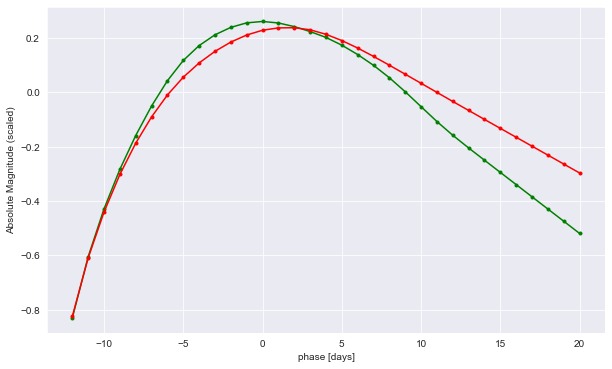

In [10]:
# training data example
xr = np.arange(-12, 21, 1)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(xr, X[4, :len(X.T)//2], 'g.-')
ax.plot(xr, X[4, len(X.T)//2:], 'r.-')
ax.set_xlabel('phase [days]')
ax.set_ylabel('Absolute Magnitude (scaled)')

In [11]:
tf.random.set_seed(42)
model = Sequential()
l_r, b_1, b_2, eps, lrelu = (0.0006, 0.9, 0.999, 1e-8, 0.05)
activation = LeakyReLU(lrelu)

model.add(Dense(len(dfx.columns), activation=activation))
model.add(Dense(48,activation=activation))
model.add(Dropout(0.4))
model.add(Dense(32,activation=activation))
model.add(Dropout(0.3))
model.add(Dense(16,activation=activation))
model.add(Dense(1,activation='linear'))


optimizer = Adam(
    learning_rate=l_r,
    beta_1=b_1,
    beta_2=b_2,
    epsilon=eps,
    amsgrad=False)

model.compile(optimizer=optimizer,loss='mse')
model.fit(x=X_train, y=y_train.values,
           validation_data=(X_test, y_test.values),
           batch_size=64,epochs=300, verbose=1)

losses = pd.DataFrame(model.history.history)

Epoch 1/300
15/15 [==============================] - 0s 8ms/step - loss: 0.0362 - val_loss: 0.0073
Epoch 2/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0031
Epoch 3/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0022
Epoch 4/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0019
Epoch 5/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 6/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 7/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 8/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 9/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 10/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 8.2347e-04
Epoch

Epoch 78/300
15/15 [==============================] - 0s 3ms/step - loss: 4.7974e-04 - val_loss: 3.8309e-04
Epoch 79/300
15/15 [==============================] - 0s 3ms/step - loss: 4.7687e-04 - val_loss: 3.9124e-04
Epoch 80/300
15/15 [==============================] - 0s 2ms/step - loss: 4.6390e-04 - val_loss: 3.8991e-04
Epoch 81/300
15/15 [==============================] - 0s 2ms/step - loss: 5.0078e-04 - val_loss: 3.8416e-04
Epoch 82/300
15/15 [==============================] - 0s 2ms/step - loss: 4.7107e-04 - val_loss: 3.7883e-04
Epoch 83/300
15/15 [==============================] - 0s 2ms/step - loss: 4.7892e-04 - val_loss: 3.8268e-04
Epoch 84/300
15/15 [==============================] - 0s 2ms/step - loss: 4.8639e-04 - val_loss: 3.9637e-04
Epoch 85/300
15/15 [==============================] - 0s 2ms/step - loss: 4.5850e-04 - val_loss: 3.7911e-04
Epoch 86/300
15/15 [==============================] - 0s 2ms/step - loss: 4.8154e-04 - val_loss: 3.8990e-04
Epoch 87/300
15/15 [========

15/15 [==============================] - 0s 3ms/step - loss: 4.1284e-04 - val_loss: 3.4259e-04
Epoch 154/300
15/15 [==============================] - 0s 2ms/step - loss: 4.1649e-04 - val_loss: 3.5173e-04
Epoch 155/300
15/15 [==============================] - 0s 2ms/step - loss: 4.1440e-04 - val_loss: 3.5579e-04
Epoch 156/300
15/15 [==============================] - 0s 2ms/step - loss: 4.1726e-04 - val_loss: 3.5661e-04
Epoch 157/300
15/15 [==============================] - 0s 2ms/step - loss: 4.0979e-04 - val_loss: 3.4621e-04
Epoch 158/300
15/15 [==============================] - 0s 2ms/step - loss: 4.2493e-04 - val_loss: 3.5827e-04
Epoch 159/300
15/15 [==============================] - 0s 2ms/step - loss: 4.0995e-04 - val_loss: 3.6057e-04
Epoch 160/300
15/15 [==============================] - 0s 3ms/step - loss: 4.0318e-04 - val_loss: 3.5373e-04
Epoch 161/300
15/15 [==============================] - 0s 3ms/step - loss: 3.9592e-04 - val_loss: 3.6461e-04
Epoch 162/300
15/15 [============

15/15 [==============================] - 0s 2ms/step - loss: 3.5309e-04 - val_loss: 3.5637e-04
Epoch 229/300
15/15 [==============================] - 0s 2ms/step - loss: 3.5967e-04 - val_loss: 3.3986e-04
Epoch 230/300
15/15 [==============================] - 0s 2ms/step - loss: 3.5617e-04 - val_loss: 3.4985e-04
Epoch 231/300
15/15 [==============================] - 0s 2ms/step - loss: 3.6300e-04 - val_loss: 3.3237e-04
Epoch 232/300
15/15 [==============================] - 0s 3ms/step - loss: 3.6127e-04 - val_loss: 3.2216e-04
Epoch 233/300
15/15 [==============================] - 0s 2ms/step - loss: 3.6172e-04 - val_loss: 3.5434e-04
Epoch 234/300
15/15 [==============================] - 0s 2ms/step - loss: 3.9144e-04 - val_loss: 3.9662e-04
Epoch 235/300
15/15 [==============================] - 0s 2ms/step - loss: 3.7767e-04 - val_loss: 3.6253e-04
Epoch 236/300
15/15 [==============================] - 0s 3ms/step - loss: 3.7377e-04 - val_loss: 3.6206e-04
Epoch 237/300
15/15 [============

6/6 [==============================] - 0s 1000us/step
0.037137064214767694
(0.0016477822837337051, 0.017985371096277316)


C:\Users\Robert\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


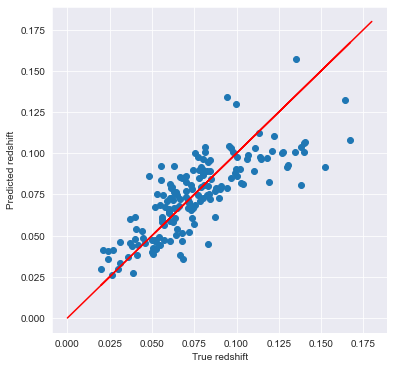

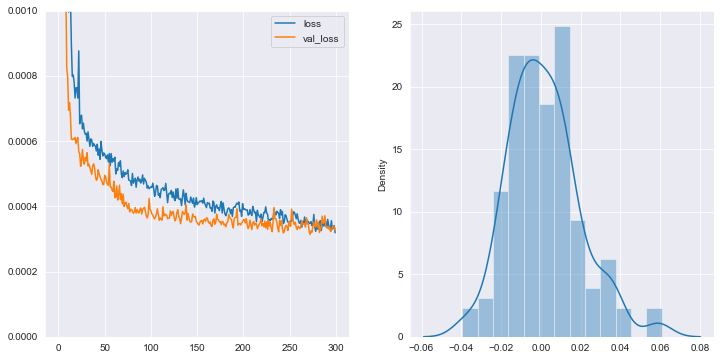

In [14]:
predictions = model.predict(X_test)
print(np.sqrt(np.mean((predictions-y_test.values)**2)))
fig2, ax3 =plt.subplots(figsize=(6, 6))
ax3.scatter(y_test.values, predictions.flatten())
ax3.plot([0, 0.18], [0, 0.18],'r')
ax3.plot(y_test.values, y_test.values, 'r')
ax3.set_xlabel('True redshift')
ax3.set_ylabel('Predicted redshift')

fig1, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12, 6))
losses.plot(ax=ax1)
errors = y_test.values - predictions.flatten()
ax1.set_ylim([0, 0.001])
sns.distplot(errors, ax=ax2)
print(stats.norm.fit(errors))